In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pwd

/Users/marcantoinelementec/code/marcan-dev/cyclistic_bike_share_2023


In [3]:
df_final = pd.read_csv('df_final.csv')

In [4]:
df_final['started_at'] = pd.to_datetime(df_final['started_at'])
df_final['ended_at'] = pd.to_datetime(df_final['ended_at'])


In [5]:
df_final.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'duration_hour', 'distance_km'],
      dtype='object')

In [6]:
member_casual_duration = df_final.groupby('member_casual')['duration_hour','distance_km'].mean().reset_index()

/var/folders/5_/30y4rfr95g91wwfyz8f8pjlr0000gn/T/ipykernel_6427/4006424735.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  member_casual_duration = df_final.groupby('member_casual')['duration_hour','distance_km'].mean().reset_index()


In [7]:
df_final.groupby('member_casual')['duration_hour'].mean()

member_casual
casual    0.305394
member    0.194732
Name: duration_hour, dtype: float64

In [8]:
df_final.groupby('member_casual')['distance_km'].mean()

member_casual
casual    2.132789
member    2.079476
Name: distance_km, dtype: float64

Text(0.5, 1.0, 'Casual Histogram')

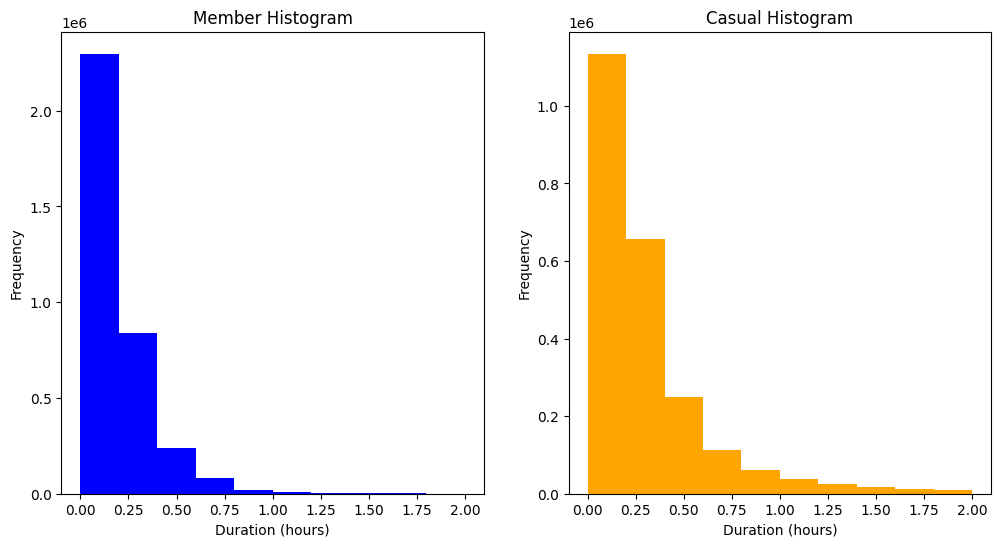

In [9]:
# Display the plot
plt.show()

#Malgrès une durée d'utilisation très différente, les distances de trajet sont sensiblement les même

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.hist(df_final[df_final['member_casual'] == 'member'].duration_hour,color='blue')
ax1.set_xlabel('Duration (hours)')
ax1.set_ylabel('Frequency')
ax1.set_title('Member Histogram')
ax2.hist(df_final[df_final['member_casual'] == 'casual'].duration_hour,color='orange')
ax2.set_xlabel('Duration (hours)')
ax2.set_ylabel('Frequency')
ax2.set_title('Casual Histogram')


<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Casual Histogram')

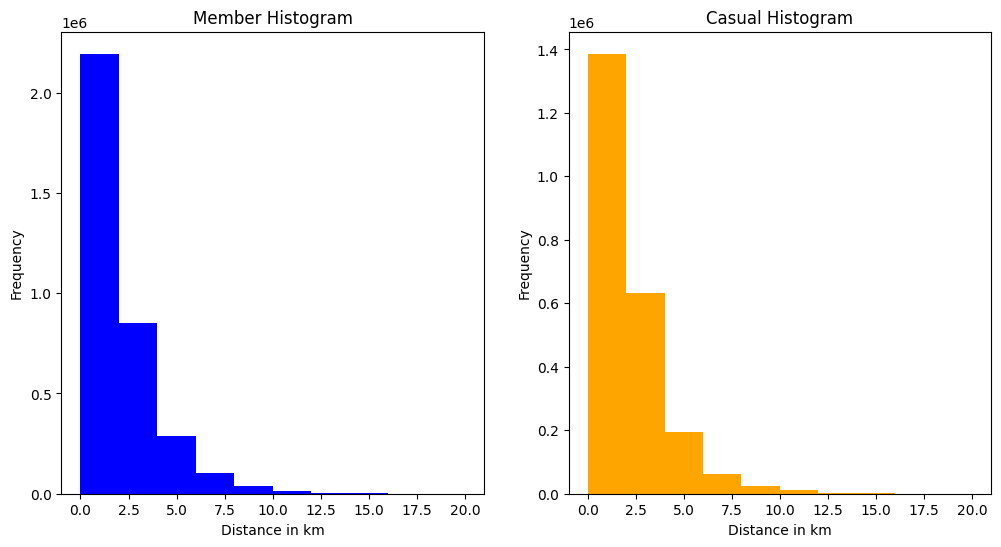

In [10]:
plt.tight_layout()
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.hist(df_final[df_final['member_casual'] == 'member'].distance_km,color='blue')
ax1.set_xlabel('Distance in km')
ax1.set_ylabel('Frequency')
ax1.set_title('Member Histogram')
ax2.hist(df_final[df_final['member_casual'] == 'casual'].distance_km,color='orange')
ax2.set_xlabel('Distance in km')
ax2.set_ylabel('Frequency')
ax2.set_title('Casual Histogram')


In [27]:
df_final_sorted = df_final.sort_values(by='started_at')

In [28]:
#df_final.groupby(df_final['started_at'].dt.month)['ride_id'].count()
df_final_sorted['month'] = df_final_sorted['started_at'].dt.month

In [30]:
df_final_sorted.sort_values(by='month',inplace=True)

La durée des trajets est aussi plus longue pour les mois compris entre avril et septembre

In [31]:
df_nbrides_month = df_final_sorted.groupby(['month', 'member_casual'])['ride_id'].count().to_frame().reset_index()

In [32]:
df_nbrides_month

,month,member_casual,ride_id
0,1,casual,39611
1,1,member,149895
2,2,casual,42527
3,2,member,147041
4,3,casual,61536
5,3,member,196036
6,4,casual,145119
7,4,member,278723
8,5,casual,274450
9,5,member,353868


In [33]:
df_nbrides_month['month'] = df_nbrides_month['month'].map({
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
})

In [34]:
df_nbrides_month

,month,member_casual,ride_id
0,January,casual,39611
1,January,member,149895
2,February,casual,42527
3,February,member,147041
4,March,casual,61536
5,March,member,196036
6,April,casual,145119
7,April,member,278723
8,May,casual,274450
9,May,member,353868


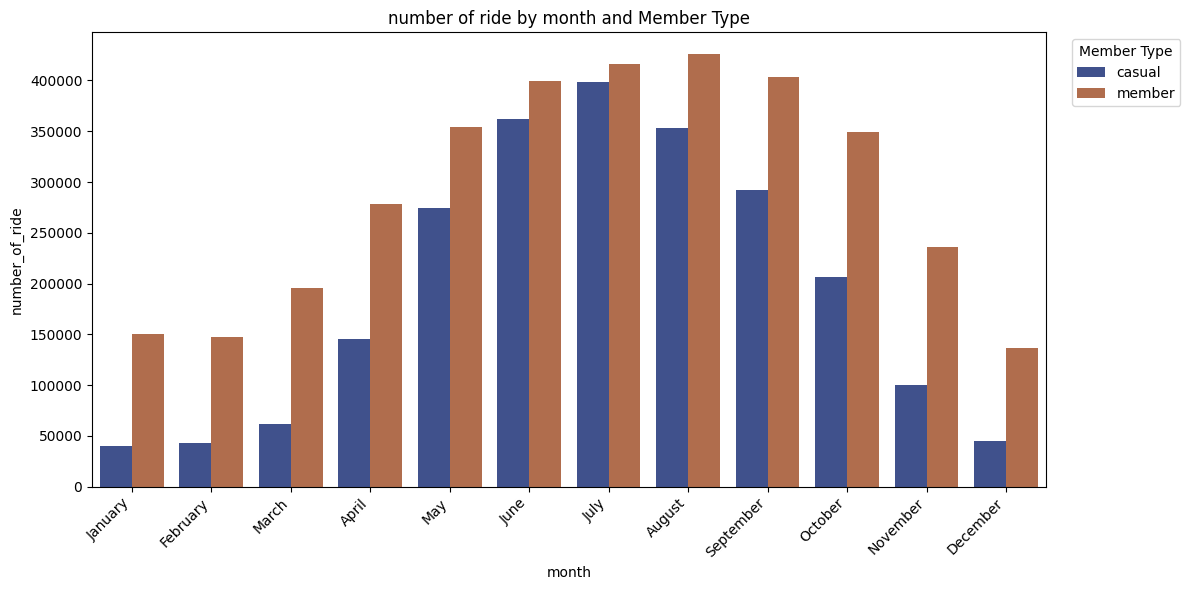

In [35]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_nbrides_month, x='month', y='ride_id', hue='member_casual', palette='dark', alpha=0.8)
plt.xlabel('month')
plt.ylabel('number_of_ride')
plt.title('number of ride by month and Member Type')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Member Type', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [36]:
duration_distance_by_month =df_final_sorted.groupby(['month','member_casual'])[['duration_hour','distance_km']].mean().reset_index()

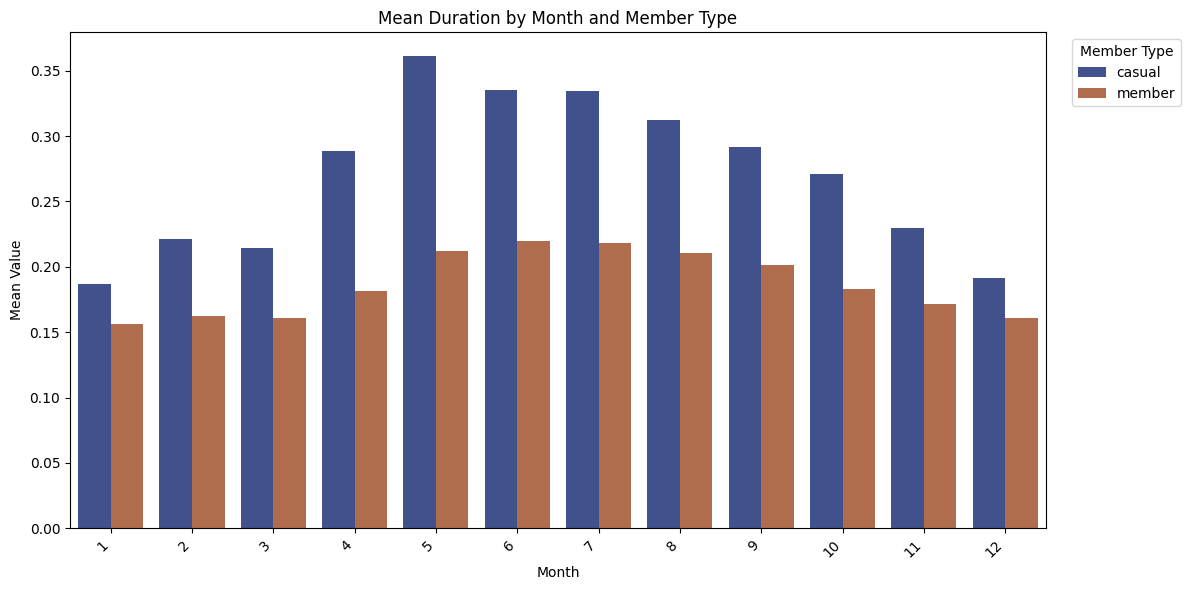

In [37]:
plt.figure(figsize=(12, 6))
sns.barplot(data=duration_distance_by_month, x='month', y='duration_hour', hue='member_casual', palette='dark', alpha=0.8)
plt.xlabel('Month')
plt.ylabel('Mean Value')
plt.title('Mean Duration by Month and Member Type')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Member Type', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

Pour les 2 catégories d'utilisateur, il y a plus de distance parcourue entre avril et septembre

In [38]:
df_final_sorted['day_of_week'] = df_final_sorted['started_at'].dt.dayofweek

In [41]:
df_final_sorted['day_of_week'] = df_final_sorted['day_of_week'].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})

In [43]:
duration_distance_by_day =df_final_sorted.groupby(['day_of_week','member_casual'])[['duration_hour','distance_km']].mean().reset_index()

Durée et distance moyenne des trajets par jour de la semaine

In [ ]:
# Map day of the week integers to day names
#duration_distance_by_day['day_of_week'] = duration_distance_by_day['day_of_week'].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})
duration_distance_by_day

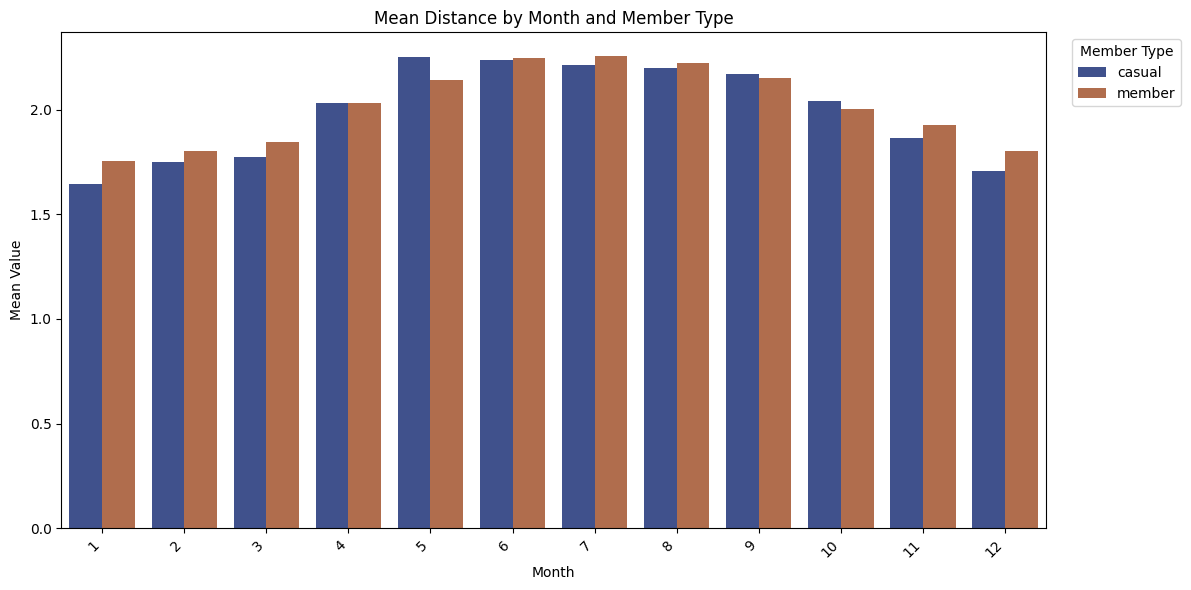

In [44]:
plt.figure(figsize=(12, 6))
sns.barplot(data=duration_distance_by_month, x='month', y='distance_km', hue='member_casual', palette='dark', alpha=0.8)
plt.xlabel('Month')
plt.ylabel('Mean Value')
plt.title('Mean Distance by Month and Member Type')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Member Type', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

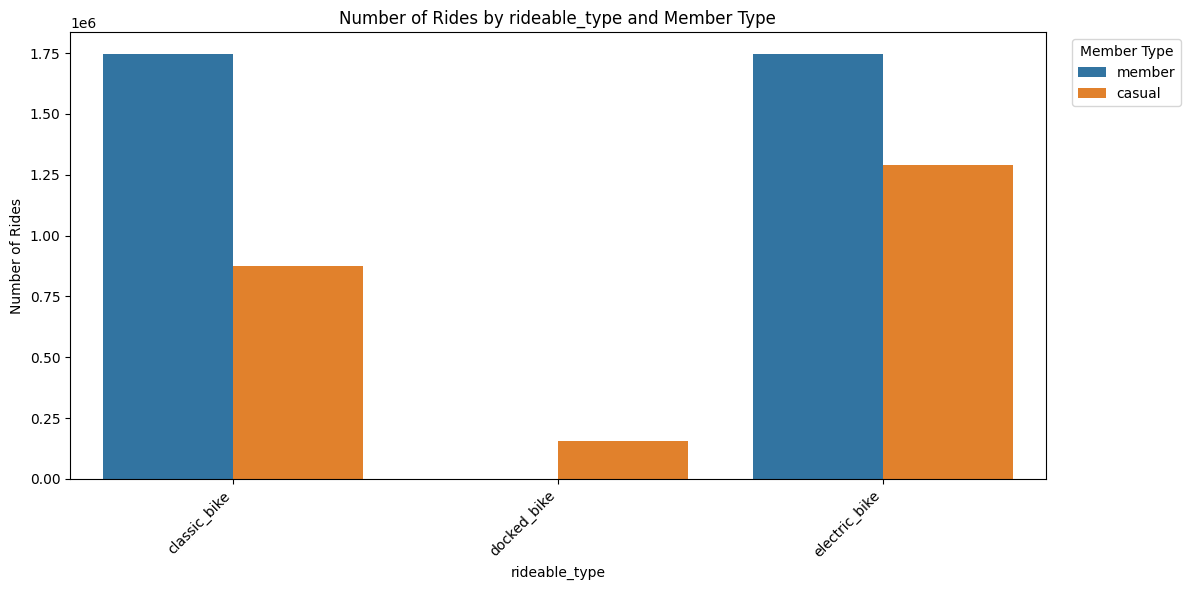

In [45]:
plt.figure(figsize=(12, 6))
sns.countplot(x = 'rideable_type',hue='member_casual',data=df_final)
plt.xlabel('rideable_type')
plt.ylabel('Number of Rides')
plt.title('Number of Rides by rideable_type and Member Type')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Member Type', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [46]:
rides_by_day_of_week = df_final_sorted['day_of_week'].value_counts().sort_index()
rides_by_day_of_week

Friday       841301
Monday       754637
Saturday     912376
Sunday       781773
Thursday     874064
Tuesday      812095
Wednesday    837010
Name: day_of_week, dtype: int64

In [47]:
# Group the DataFrame by 'day_of_week' and 'member_casual', then count the number of rides for each group
rides_by_day_and_member = df_final_sorted.groupby(['day_of_week', 'member_casual'])['ride_id'].count().to_frame()

In [50]:
custom_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
rides_by_day_and_member = rides_by_day_and_member.sort_values(by='day_of_week', key=lambda x: x.map({day: idx for idx, day in enumerate(custom_order)})).reset_index()
rides_by_day_and_member

,day_of_week,member_casual,ride_id
0,Monday,casual,271016
1,Monday,member,483621
2,Tuesday,casual,268800
3,Tuesday,member,543295
4,Wednesday,casual,281056
5,Wednesday,member,555954
6,Thursday,casual,314306
7,Thursday,member,559758
8,Friday,casual,344978
9,Friday,member,496323


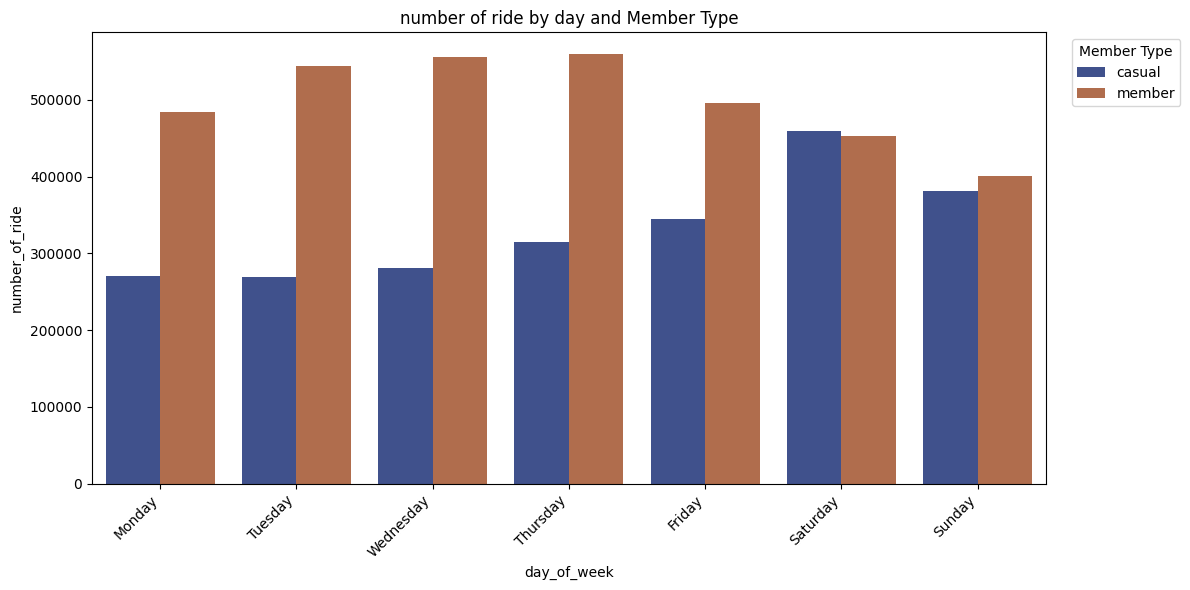

In [51]:
plt.figure(figsize=(12, 6))
sns.barplot(data=rides_by_day_and_member, x='day_of_week', y='ride_id', hue='member_casual', palette='dark', alpha=0.8)
plt.xlabel('day_of_week')
plt.ylabel('number_of_ride')
plt.title('number of ride by day and Member Type')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Member Type', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

Les "member" roulent plutot la semaine par rapport aux "casual"


In [52]:
df_final.shape

(5813256, 16)

In [64]:
tableau1 = df_final.groupby(['rideable_type','member_casual']).agg({'duration_hour':'mean'})

In [65]:
tableau1

duration_hour
rideable_type member_casual               
classic_bike  casual              0.339907
              member              0.209737
docked_bike   casual              0.560090
electric_bike casual              0.251478
              member              0.179703

In [66]:
# Create a DataFrame
df8 = pd.DataFrame(tableau1)

# Define a function to convert hours to hours, minutes, and seconds
def format_duration(duration):
    hours = int(duration)
    minutes = int((duration - hours) * 60)
    seconds = int(((duration - hours) * 60 - minutes) * 60)
    return f"{hours}h {minutes}m {seconds}s"

# Apply the function to the 'duration_hour' column
df8['duration_hour'] = df8['duration_hour'].apply(format_duration)

# Display the DataFrame
print(df8)

                            duration_hour
rideable_type member_casual              
classic_bike  casual           0h 20m 23s
              member           0h 12m 35s
docked_bike   casual           0h 33m 36s
electric_bike casual            0h 15m 5s
              member           0h 10m 46s


In [67]:
df8

duration_hour
rideable_type member_casual              
classic_bike  casual           0h 20m 23s
              member           0h 12m 35s
docked_bike   casual           0h 33m 36s
electric_bike casual            0h 15m 5s
              member           0h 10m 46s